In [1]:
import covid_feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression

In [2]:
def lasso_coefs(X, y, feature_labels, plot=False, save=False, save_county=None):
    kf = KFold(n_splits=5)
    lambdas = np.logspace(-8,-1,100)

    scores = []
    min_error = 1e6
    min_index = 0
    coefs = []

    X = np.array(X)
    y = np.array(y)

    for i in range(len(lambdas)):
        score_arr = []
        coef_arr = []
        for train_indices, test_indices in kf.split(X):
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            lasso = Lasso(alpha=lambdas[i],max_iter=10000).fit(X_train, y_train)
            coef_arr.append(lasso.coef_)
            y_pred = lasso.predict(X_test)
            score_arr.append(mean_squared_error(y_test, y_pred))
        avg_score = np.array(score_arr).mean()
        if avg_score <= min_error:
            min_error = avg_score
            min_index = i
            best_lambda = lambdas[i]
        scores.append(avg_score)
        coefs.append(np.array(coef_arr).mean(axis=0))

    if plot:
        fig, ax1 = plt.subplots(figsize=(15,6))
        coefs = np.array(coefs)
        for i in range(len(coefs.T)):
            ax1.plot(lambdas,coefs[:,i],label=feature_labels[i])
        ax1.set_xscale("log")
        ax1.set_ylabel("Coefficients",fontsize=14,labelpad=8)
        ax1.set_xlabel(r"$\lambda$",fontsize=14,labelpad=8)
        ax1.tick_params(axis='both', which='major', labelsize=12)
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()

        ax2.plot(lambdas,scores,color='k',linestyle='--',alpha=0.5,label="Error")
        ax2.axvline(best_lambda,color='red',linestyle='--',alpha=0.5)
        ax2.set_ylabel("Mean Squared Error",fontsize=14,labelpad=8)
        ax2.tick_params(axis='both', which='major', labelsize=12)

        if save:
            plt.savefig("{}_lasso_coefs.png".format(save_county))
        plt.show()
    
    return coefs[min_index]

# Population Not Staying Home

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


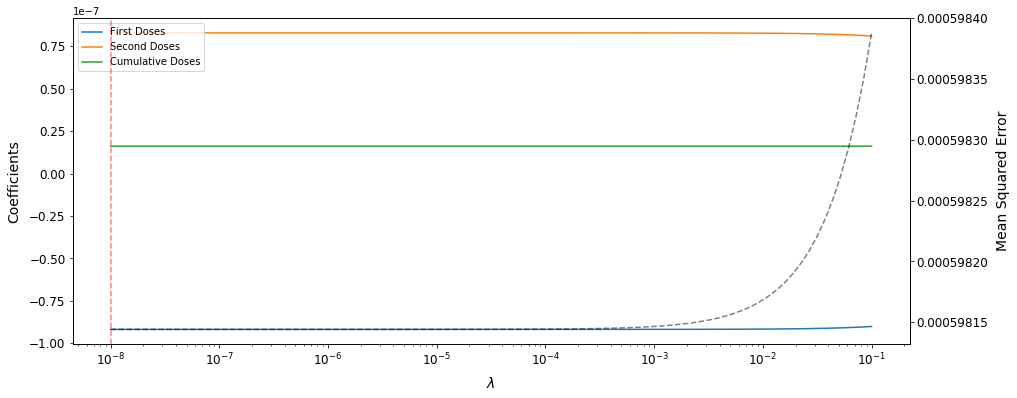

First Doses
----------------------
F: 1.583163932430877
p: 0.2104614095801462

Second Doses
----------------------
F: 1.125126718510469
p: 0.290697305253136

Cumulative Doses
----------------------
F: 444.64772465460436
p: 1.0615573499497616e-44



In [13]:
alloc_dates, state_y, first_dose = covid_feature_extraction.first_dose("Georgia","GA","Population")
alloc_dates, state_y, second_dose = covid_feature_extraction.second_dose("Georgia","GA","Population")
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")

state_X = np.concatenate([np.array(first_dose).reshape(len(first_dose),1),
                      np.array(second_dose).reshape(len(second_dose),1),
                      np.array(cumul_doses).reshape(len(cumul_doses),1)],axis=1)

first_dose_Fval, first_dose_pval = f_regression(np.array(first_dose).reshape(-1, 1), state_y)
second_dose_Fval, second_dose_pval = f_regression(np.array(second_dose).reshape(-1, 1), state_y)
cumul_doses_Fval, cumul_doses_pval = f_regression(np.array(cumul_doses).reshape(-1, 1), state_y)

feature_labels = ["First Doses", "Second Doses", "Cumulative Doses"]
state_coefs = lasso_coefs(state_X, state_y, feature_labels, plot=True)
print(feature_labels[0])
print("----------------------")
print("F: {}\np: {}".format(first_dose_Fval[0], first_dose_pval[0]))
print()
print(feature_labels[1])
print("----------------------")
print("F: {}\np: {}".format(second_dose_Fval[0], second_dose_pval[0]))
print()
print(feature_labels[2])
print("----------------------")
print("F: {}\np: {}".format(cumul_doses_Fval[0], cumul_doses_pval[0]))
print()

# Long Trips

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


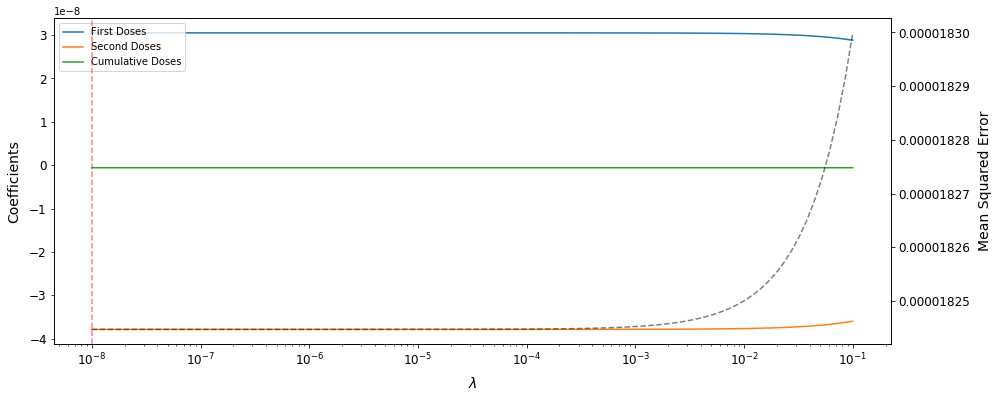

First Doses
----------------------
F: 1.0829802849210912
p: 0.2998783054278036

Second Doses
----------------------
F: 1.4925833397421835
p: 0.22392951177817697

Cumulative Doses
----------------------
F: 12.721857123861158
p: 0.0004995820114076121



In [14]:
alloc_dates, state_y, first_dose = covid_feature_extraction.first_dose("Georgia","GA","Long")
alloc_dates, state_y, second_dose = covid_feature_extraction.second_dose("Georgia","GA","Long")
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")

state_X = np.concatenate([np.array(first_dose).reshape(len(first_dose),1),
                      np.array(second_dose).reshape(len(second_dose),1),
                      np.array(cumul_doses).reshape(len(cumul_doses),1)],axis=1)

first_dose_Fval, first_dose_pval = f_regression(np.array(first_dose).reshape(-1, 1), state_y)
second_dose_Fval, second_dose_pval = f_regression(np.array(second_dose).reshape(-1, 1), state_y)
cumul_doses_Fval, cumul_doses_pval = f_regression(np.array(cumul_doses).reshape(-1, 1), state_y)

feature_labels = ["First Doses", "Second Doses", "Cumulative Doses"]
state_coefs = lasso_coefs(state_X, state_y, feature_labels, plot=True)
print(feature_labels[0])
print("----------------------")
print("F: {}\np: {}".format(first_dose_Fval[0], first_dose_pval[0]))
print()
print(feature_labels[1])
print("----------------------")
print("F: {}\np: {}".format(second_dose_Fval[0], second_dose_pval[0]))
print()
print(feature_labels[2])
print("----------------------")
print("F: {}\np: {}".format(cumul_doses_Fval[0], cumul_doses_pval[0]))
print()

# Medium Trips

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


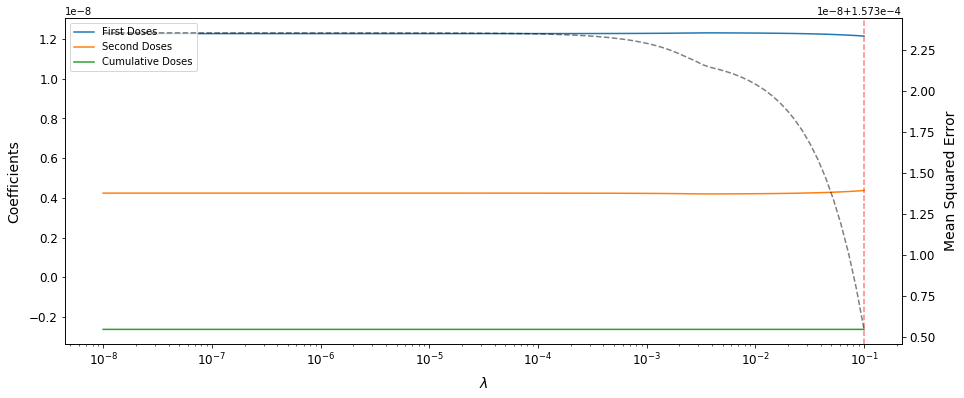

First Doses
----------------------
F: 0.07018436743214075
p: 0.7914696327142232

Second Doses
----------------------
F: 0.15568218304821596
p: 0.6937814139255662

Cumulative Doses
----------------------
F: 38.3912021700653
p: 6.448735754005574e-09



In [15]:
alloc_dates, state_y, first_dose = covid_feature_extraction.first_dose("Georgia","GA","Medium")
alloc_dates, state_y, second_dose = covid_feature_extraction.second_dose("Georgia","GA","Medium")
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")

state_X = np.concatenate([np.array(first_dose).reshape(len(first_dose),1),
                      np.array(second_dose).reshape(len(second_dose),1),
                      np.array(cumul_doses).reshape(len(cumul_doses),1)],axis=1)

first_dose_Fval, first_dose_pval = f_regression(np.array(first_dose).reshape(-1, 1), state_y)
second_dose_Fval, second_dose_pval = f_regression(np.array(second_dose).reshape(-1, 1), state_y)
cumul_doses_Fval, cumul_doses_pval = f_regression(np.array(cumul_doses).reshape(-1, 1), state_y)

feature_labels = ["First Doses", "Second Doses", "Cumulative Doses"]
state_coefs = lasso_coefs(state_X, state_y, feature_labels, plot=True)
print(feature_labels[0])
print("----------------------")
print("F: {}\np: {}".format(first_dose_Fval[0], first_dose_pval[0]))
print()
print(feature_labels[1])
print("----------------------")
print("F: {}\np: {}".format(second_dose_Fval[0], second_dose_pval[0]))
print()
print(feature_labels[2])
print("----------------------")
print("F: {}\np: {}".format(cumul_doses_Fval[0], cumul_doses_pval[0]))
print()

# Short Trips

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


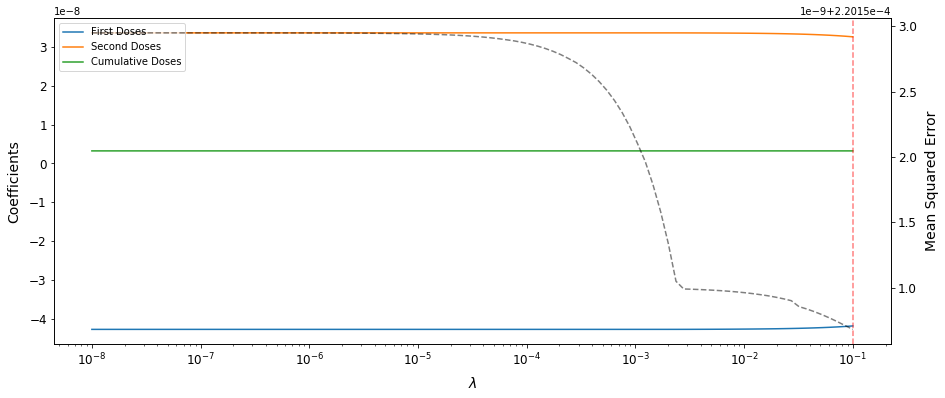

First Doses
----------------------
F: 0.0037130775786623584
p: 0.951500408926653

Second Doses
----------------------
F: 1.8349409036840026e-06
p: 0.9989211709254903

Cumulative Doses
----------------------
F: 42.79045134926273
p: 1.139233275220888e-09



In [16]:
alloc_dates, state_y, first_dose = covid_feature_extraction.first_dose("Georgia","GA","Short")
alloc_dates, state_y, second_dose = covid_feature_extraction.second_dose("Georgia","GA","Short")
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")

state_X = np.concatenate([np.array(first_dose).reshape(len(first_dose),1),
                      np.array(second_dose).reshape(len(second_dose),1),
                      np.array(cumul_doses).reshape(len(cumul_doses),1)],axis=1)

first_dose_Fval, first_dose_pval = f_regression(np.array(first_dose).reshape(-1, 1), state_y)
second_dose_Fval, second_dose_pval = f_regression(np.array(second_dose).reshape(-1, 1), state_y)
cumul_doses_Fval, cumul_doses_pval = f_regression(np.array(cumul_doses).reshape(-1, 1), state_y)

feature_labels = ["First Doses", "Second Doses", "Cumulative Doses"]
state_coefs = lasso_coefs(state_X, state_y, feature_labels, plot=True)
print(feature_labels[0])
print("----------------------")
print("F: {}\np: {}".format(first_dose_Fval[0], first_dose_pval[0]))
print()
print(feature_labels[1])
print("----------------------")
print("F: {}\np: {}".format(second_dose_Fval[0], second_dose_pval[0]))
print()
print(feature_labels[2])
print("----------------------")
print("F: {}\np: {}".format(cumul_doses_Fval[0], cumul_doses_pval[0]))
print()